first, we need to generate GMM models. 
Just recall the function of Guassian Mixture Models is:

\begin{equation}
\large
p(\mathbf x | \mathbf\mu, \mathbf\Sigma) = \frac 1 {({2\pi})^{n/2}|\Sigma|^{1/2}}\exp\left(-\frac 1 2 (\mathbf x -\mathbf\mu)^T\mathbf\Sigma^{-1}(\mathbf x -\mathbf\mu)\right)
\end{equation}

Covariance Matrics: $$ \Sigma $$

Calculation for Covariance Matrics:

$$
\mathbf{X}=\left(X_{1}, X_{2}, \ldots, X_{n}\right)^{\mathrm{T}}
$$


$$
\mathrm{K}_{\mathrm{XX}}=\left[\begin{array}{cccc}{\mathrm{E}\left[\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\right]} & {\mathrm{E}\left[\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\right]} & {\cdots} & {\mathrm{E}\left[\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\right]} \\ {\mathrm{E}\left[\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\right]} & {\mathrm{E}\left[\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\right]} & {\cdots} & {\mathrm{E}\left[\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\right]} \\ {\vdots} & {\vdots} & {\ddots} & {\vdots} \\ {\mathrm{E}\left[\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\right]} & {\mathrm{E}\left[\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\right]} & {\cdots} & {\mathrm{E}\left[\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\right]}\end{array}\right]
$$

Now we use sklearn iris data

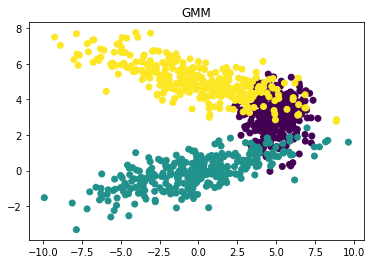

(900, 900)


In [39]:
# from sklearn import datasets
# iris = datasets.load_iris()
# X = iris.data
# print(X[:10])
# plt.scatter(X[:, 0], X[:, 1])
# plt.title('0 column and 1 colmun')
# plt.show()
# plt.scatter(X[:, 2], X[:, 3])
# plt.title('2 column and 3 colmun')
# plt.show()

import numpy as np
import matplotlib.pyplot as plt
n_samples = 300

# generate random sample, two cluster
np.random.seed(0)
# generate spherical data 
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([5, 3])
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
# the other one
stretched_shifted_gaussian = np.dot(np.random.randn(n_samples, 2), np.array([[0., -0.7], [-3.5, .7]])) + np.array([0, 5])

# concatenate the two datasets into the final training set
X = np.vstack([shifted_gaussian, stretched_gaussian, stretched_shifted_gaussian])

cluster = [0 for n in range(n_samples)] + [1 for n in range(n_samples)] + [2 for n in range(n_samples)]

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.title('GMM')
plt.show()

# calculating Cov
cov_X = np.cov(X)
print(cov_X.shape)

<hr>
z is a latent variable correspinding to the probability of x(i) is from K-cluster.  

Defining the marginal distribution over z is specified in terms of the mixing coefficients $$
\pi_{k}
$$

So:
$$
p\left(z_{k}=1\right)=\pi_{k}
$$

$$
p(\mathbf{z})=\prod_{k=1}^{K} \pi_{k}^{z_{k}}
$$

<hr>
Similar:

$$
p\left(\mathbf{x} | z_{k}=1\right)=\mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$

$$
p(\mathbf{x} | \mathbf{z})=\prod_{k=1}^{K} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)^{z_{k}}
$$
<hr>
So as for P(x) is to sum up all the joint distribution p(z)p(x|z)
$$
p(\mathbf{x})=\sum_{\mathbf{z}} p(\mathbf{z}) p(\mathbf{x} | \mathbf{z})=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$

in this case, we need to work with the latent variable z(n) which is corresponding with x(n)

So we can work with join distribution p(x|z) instead of the marginal distribution p(x)

According to Bayes's theorem:

$$
P(A | B)=\frac{P(B | A) P(A)}{P(B)}
$$
<hr>

$$
p(\mathbf{x})=\sum_{\mathbf{z}} p(\mathbf{z}) p(\mathbf{x} | \mathbf{z})=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$
<hr>

$$
\begin{aligned} \gamma\left(z_{k}\right) \equiv p\left(z_{k}=1 | \mathbf{x}\right) &=\frac{p\left(z_{k}=1\right) p\left(\mathbf{x} | z_{k}=1\right)}{\sum_{j=1}^{K} p\left(z_{j}=1\right) p\left(\mathbf{x} | z_{j}=1\right)} \\ &=\frac{\pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{j}, \mathbf{\Sigma}_{j}\right)} \end{aligned}
$$
<hr>

Be careful, maybe there is a singularity problem. Check this link:
https://stats.stackexchange.com/questions/219302/singularity-issues-in-gaussian-mixture-model
